### Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_seq_items', None)
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [2]:
np.set_printoptions(threshold=np.nan)

import warnings
import traceback

warnings.filterwarnings('ignore')
import argparse
import re
import sys, os

sys.path.append(os.getcwd())

import os
import requests
from requests.exceptions import ConnectionError

import bs4
from bs4 import BeautifulSoup
from fastnumbers import isfloat
from fastnumbers import fast_float
from multiprocessing.dummy import Pool as ThreadPool 
import more_itertools
from random import shuffle

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
import json

import seaborn as sns
sns.set_style('whitegrid')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mplt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from IPython.core.interactiveshell import InteractiveShell
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import math
import gc
import ipaddress
from urllib.parse import urlparse
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

from data_science_utils import dataframe as df_utils
from data_science_utils import models as model_utils
from data_science_utils.dataframe import column as column_utils
from data_science_utils.models.IdentityScaler import IdentityScaler as IdentityScaler


from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

import lightgbm as lgb

np.set_printoptions(threshold=np.nan)
import pickle



plt.rcParams["figure.figsize"] = (24,4)

from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
import missingno as msno
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import datetime
from scipy import signal
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn import linear_model
from sklearn.metrics import roc_auc_score



InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_seq_items', None)
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

from data_science_utils.financial import *





### Company Analysis and Filtering 



#### Criterias - Current
- both NSE and BSE listing
- Not PSU
- Market Cap >= 200 Cr
- Low P/E, pe<20 in all cases, pe wrt to MarketCap and eps increase
- Low debt/Equity Ratio, de<1 in all cases
- P/B ratio
- Current Ratio > 1
- OPM % latest quarter > 10% 
- PEG < 3 , recovery by cumulative profit sum in less than 8 years
- Recovery years on investment by cumulative profits or by pure earnings < 10

#### Criterias - Over time 
- Increasing Sale YoY
- Decreasing d/e ratio YoY
- Increasing eps YoY
- No Steep Price increase in last 2 years

#### Criterias - Buy Now
- Below 30,100 DMA
- Low Volumes 

#### Find Good Companies from MF
- Use above criterias

If filter fails due to lack of data then let the Stock pass through

#### Testing for P/E and marketcap

In [4]:
pe_list = list()
pe_set = set()
pe_comparator = get_pe_filter()
for pe in [1,2,3,4,5,6,7,9,10,11,13]:
    for mcap in np.arange(1e2,2e3,1e2):
        if pe not in pe_set:
            if pe_comparator({"pe":pe,"market_cap":mcap}):
                pe_list.append({"mcap":mcap,"pe":pe})
                pe_set.add(pe)
pd.DataFrame.from_records(pe_list)

,mcap,pe
0,100.0,1
1,400.0,2
2,600.0,3
3,800.0,4
4,1000.0,5
5,1900.0,6


In [5]:
pe_list = list()
pe_set = set()
pe_comparator = get_pe_filter()
for pe in [1,3,7,9,10,11,13,15,17,18,19,20,21,22,25,30]:
    for mcap in np.arange(1e3,2e4,1e3):
        if pe not in pe_set:
            if pe_comparator({"pe":pe,"market_cap":mcap}):
                pe_list.append({"mcap":mcap,"pe":pe})
                pe_set.add(pe)
pd.DataFrame.from_records(pe_list)


,mcap,pe
0,1000.0,1
1,1000.0,3
2,3000.0,7
3,5000.0,9
4,6000.0,10
5,6000.0,11
6,8000.0,13
7,10000.0,15
8,14000.0,17
9,16000.0,18


#### Test PB

In [6]:
pb_list = list()
pb_comparator_test = get_pb_filter()
pb_set = set()
for pb in [1,1.5,2,2.5,3,4]:
    for mcap in np.arange(1e2,2e3,1e2):
        if pb not in pb_set:
            if pb_comparator_test({'market_cap':mcap,"pb":pb,"book_value":10}):
                pb_list.append({"mcap":mcap,"pb":pb})
                pb_set.add(pb)
pd.DataFrame.from_records(pb_list)

,mcap,pb
0,200.0,1.0
1,400.0,1.5
2,600.0,2.0
3,800.0,2.5
4,1000.0,3.0


In [7]:
pb_comparator_test = get_pb_filter()
pb_list = list()
pb_set = set()
for pb in [1,2,3,4,4.5,5]:
    for mcap in np.arange(1e3,2e4,1e3):
        if pb not in pb_set:
            if pb_comparator_test({'market_cap':mcap,"pb":pb,"book_value":10}):
                pb_list.append({"mcap":mcap,"pb":pb})
                pb_set.add(pb)
pd.DataFrame.from_records(pb_list)

,mcap,pb
0,1000.0,1.0
1,1000.0,2.0
2,1000.0,3.0
3,2000.0,4.0
4,4000.0,4.5
5,6000.0,5.0


In [8]:
accumulator={}

In [9]:
failures = []

In [10]:

get_all_company_details(accumulator,failures,size=100,start=0,end=100,
                        threadpool_size=48,ignore_failures=False);

Total Number of links = 8378
Total Links after removing success and failures = 8378
Total Links To Process = 100
start = 0, end = 100


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHA

In [4]:
len(accumulator.keys())
len(failures)

1582

7850

#### Write to File

In [204]:

import dill
with open('stock_results.pkl', 'wb') as f:
    dill.dump(accumulator, f)
    dill.dump(failures, f)

### Read from File and Filter

In [3]:
import dill
with open('stock_results.pkl', 'rb') as f:
    accumulator = dill.load(f)
    failures = dill.load(f)

In [5]:
pe_filter = get_pe_filter(params={"mcap":[1e2,1e3,5e3,1e4,2e4],"pe":[1,6,11,17,22],"mcap_lower_limit":1e2,
                                  "pe_upper_limit":25})
pb_filter = get_pb_filter(params={"mcap":[1e2,5e2,1e3,2e3,6e3],"pb":[1,3,4,5,6],"pb_upper_limit":6})
profitability_filter = get_profitability_filter(params={"peg_lower_limit":0,"peg_upper_limit":4,
                                     "min_recovery_year":15,"min_cpg_lower_limit":0})
filtered_companies = filter_companies(accumulator,filters=[pe_filter,pb_filter,profitability_filter])


In [6]:
de_filter = get_generic_filter("de",-1,2,0,0)
filtered_companies = filter_companies(accumulator,filters=[pe_filter,pb_filter,profitability_filter,de_filter])

In [7]:
len(filtered_companies)

33

In [8]:
get_df_from_scrip_details(filtered_companies)

,name,scrip_name,book_value,price,deliverables,eps,industry_pe,market_cap,pb,pc,pe,de,yearly_high,yearly_low,min_csg,three_year_csg,min_cpg,three_year_cpg,min_roe,three_year_roe,peg,min_recovery_year,l_yp,two_yp,three_yp,five_yp,gain_loss_l_yp,gain_loss_two_yp,gain_loss_three_yp
0,Bajaj Auto Ltd.,BAJAJ-AUTO,705.86,2618.50,33.06,152.89,19.75,75792.46,3.71,15.99,17.13,0.00,3468.35,2605.00,4.70,5.20,6.32,11.83,22.63,26.29,1.448014,10,2838.05,2700.00,2497.45,2002.50,-7.735945,-3.018519,4.846944
1,Hero Motocorp Ltd.,HEROMOTOCO,604.11,3136.75,39.27,185.14,19.75,62663.46,5.19,14.73,16.95,NaN,4091.95,3033.75,5.32,5.32,8.35,15.86,32.46,35.19,1.068726,9,3717.75,3279.70,2738.20,1757.75,-15.627732,-4.358630,14.555182
2,Ashok Leyland Ltd.,ASHOKLEY,28.10,112.05,24.78,6.21,32.47,32858.75,3.98,13.82,18.03,0.07,167.50,98.60,15.21,24.18,27.05,82.44,14.88,21.88,0.218705,5,106.15,96.15,80.60,14.50,5.558172,16.536661,39.019851
3,Yes Bank Ltd.,YESBANK,111.66,369.75,32.39,18.32,33.95,85242.34,3.31,19.13,20.17,NaN,394.35,285.00,19.57,20.54,26.56,28.19,17.67,18.51,0.715502,8,342.51,236.50,161.73,76.67,7.953052,56.342495,128.621777
4,Gujarat Alkalies and Chemicals Ltd.,GUJALKALI,529.73,503.40,38.09,72.85,8.81,3693.88,0.95,5.58,6.90,0.09,935.00,380.55,2.97,2.97,3.66,18.40,9.66,9.66,0.375000,5,412.70,266.80,171.00,182.50,21.977223,88.680660,194.385965
5,HCL Technologies Ltd.,HCLTECH,299.22,952.60,65.75,62.63,23.32,132619.78,3.18,13.12,15.21,0.00,1108.00,824.85,5.40,5.40,5.17,5.17,28.80,28.80,2.941973,12,891.45,737.90,954.30,449.70,6.859611,29.096083,-0.178141
6,Infosys Ltd.,INFY,297.27,1373.25,55.43,73.97,23.32,300361.18,4.63,16.67,18.59,NaN,1393.80,860.00,7.00,9.40,10.02,10.02,22.77,22.77,1.855289,12,993.75,1080.50,1089.35,726.90,38.188679,27.093938,26.061413
7,Tech Mahindra Ltd.,TECHM,197.85,632.05,48.16,38.76,23.32,61945.73,3.19,12.68,16.30,0.01,729.50,374.25,2.14,7.28,16.20,20.16,21.06,21.28,0.808532,8,389.10,508.40,510.90,301.58,62.438962,24.321400,23.713055
8,Vakrangee Ltd.,VAKRANGEE,19.40,49.20,39.18,6.43,23.32,5204.02,2.53,7.60,7.64,0.07,515.00,30.85,23.91,26.18,26.71,37.64,27.07,30.95,0.202976,5,219.18,96.03,81.45,39.40,-77.552696,-48.766011,-39.594843
9,Dilip Buildcon Ltd.,DBL,169.11,728.00,77.57,45.35,26.63,9973.94,4.31,11.14,16.08,1.19,1247.50,492.75,30.08,30.08,22.91,22.91,22.76,22.76,0.701877,8,527.40,NaN,NaN,NaN,38.035647,NaN,NaN


In [9]:
scores_df = score_company_on_filters(accumulator,filters={"pe_filter":pe_filter,"pb_filter":pb_filter,
                                              "profitability_filter":profitability_filter,"de_filter":de_filter})

In [10]:
scores_df.shape

(1582, 21)

In [11]:
scores_df.head(10)

,name,scrip_name,pe_filter,pb_filter,profitability_filter,de_filter,price,industry_pe,market_cap,pb,pe,de,yearly_high,yearly_low,three_year_csg,three_year_cpg,peg,min_recovery_year,l_yp,three_yp,five_yp
0,Carborundum Universal Ltd.,CARBORUNIV,False,True,True,True,350.25,41.90,6710.89,4.13,31.11,0.00,427.0,313.00,10.48,18.49,1.682531,12.000000,347.10,173.60,113.30
1,Grindwell Norton Ltd.,GRINDWELL,False,True,False,True,509.45,41.90,5557.04,5.54,37.12,NaN,588.8,361.25,9.50,10.58,3.508507,16.000000,426.20,365.88,111.78
2,Orient Abrasives Ltd.,ORIENTABRA,False,False,False,True,29.65,41.90,354.13,29.60,20.85,0.29,67.4,26.70,8.03,-1.03,-20.242718,21.000000,31.20,26.50,21.00
3,Wendt (India) Ltd.,WENDT,False,False,False,True,2893.25,41.90,577.75,4.75,44.00,NaN,4270.0,2275.00,6.56,-6.16,-7.142857,44.000000,2525.30,2029.50,1008.00
4,Adani Green Energy Ltd.,ADANIGREEN,False,True,False,False,52.90,10.97,8218.90,5.76,NaN,2.21,56.4,22.80,NaN,NaN,NaN,inf,NaN,NaN,NaN
5,Century Extrusions Ltd.,CENTEXT,False,False,False,True,6.05,14.23,47.60,1.10,11.90,0.91,7.9,3.40,-1.52,NaN,-0.942948,inf,4.96,1.18,1.03
6,Hindalco Industries Ltd.,HINDALCO,False,True,False,True,206.55,21.26,46376.18,1.01,32.27,0.48,284.0,192.35,9.87,-5.66,-5.701413,33.000000,221.20,109.05,103.25
7,Maan Aluminium Ltd.,MAANALU,False,False,True,False,123.80,21.26,84.20,2.83,13.11,2.29,182.0,68.00,49.89,93.94,0.139557,4.000000,88.75,17.95,NaN
8,Manaksia Aluminium Company Ltd.,MANAKALUCO,False,True,False,True,6.55,21.26,43.25,0.44,34.47,0.83,19.0,5.75,10.39,NaN,0.279313,inf,6.79,4.90,NaN
9,National Aluminium Company Ltd.,NATIONALUM,True,True,False,True,62.15,21.26,12003.49,1.04,8.95,0.01,97.6,56.55,3.61,5.31,1.685499,8.000000,70.55,37.20,30.05


### Plotting and Analysis

TODO:

- Risk Analysis
- Analyze/get stocks from MF
- Cluster Analysis
    - seeing if we can cluster stocks which had good growth in past without taking their price growths
    - Analysis of various sectors overall growth based on mcap.

#### PE vs MarketCap Corr

(1, 50)

(10000, 800000)

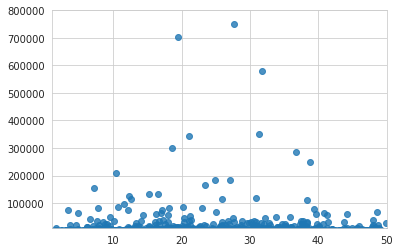

In [12]:
pe_list = []
mcap_list = []
for key in accumulator.keys():
    prices_df = accumulator[key]['past_prices']['all_past_prices']
    pe = accumulator[key]['pe']
    mcap = accumulator[key]['market_cap']
    pe_list.append(pe)
    mcap_list.append(mcap)
    
ax = sns.regplot(x=np.array(pe_list), y=np.array(mcap_list),fit_reg=False)
ax.set_xlim([1,50])
ax.set_ylim([10000,800000])
plt.show()

#### Price Volume Charts

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


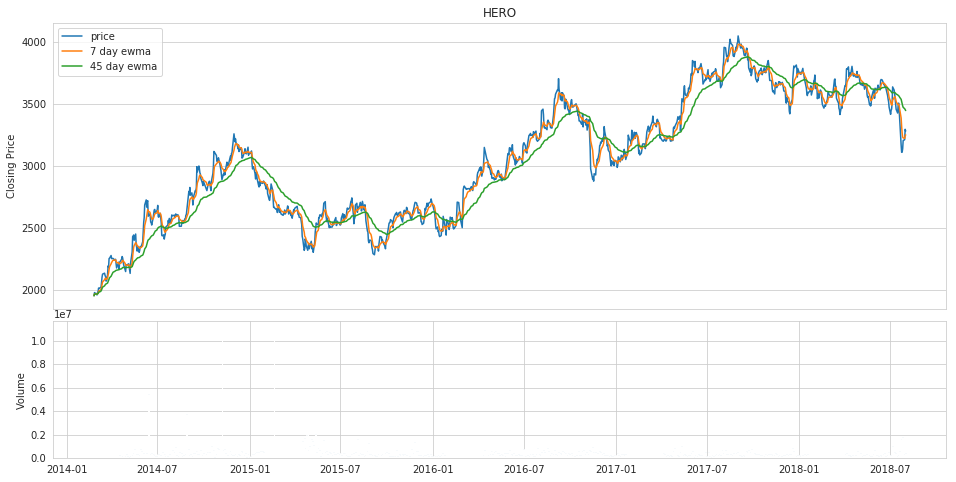

In [13]:
generate_price_volume_chart(get_scrip_info_by_nse_name('HEROMOTOCO')['past_prices']['all_past_prices'],"HERO",days=1095,ewmas=[7,45])

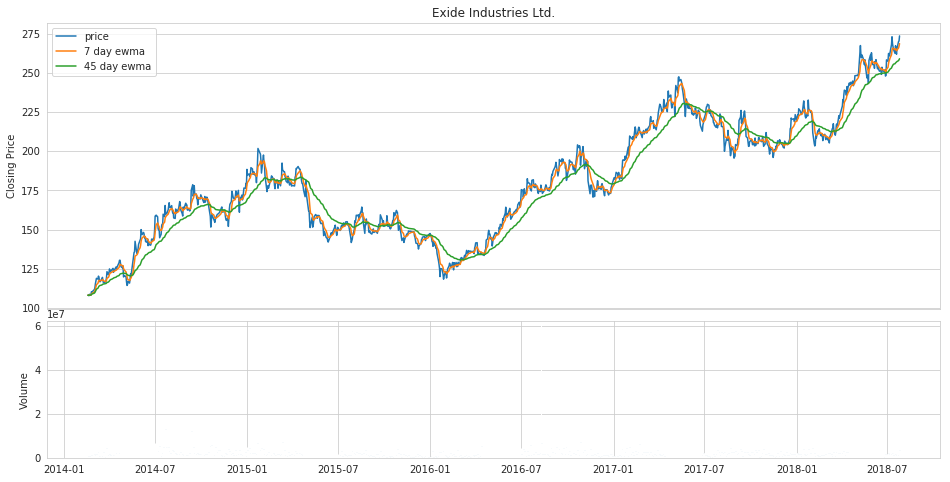

In [14]:
generate_price_volume_chart(accumulator['EXIDEIND']['past_prices']['all_past_prices'],accumulator['EXIDEIND']['name'],days=1095,ewmas=[7,45])


#### Returns analysis

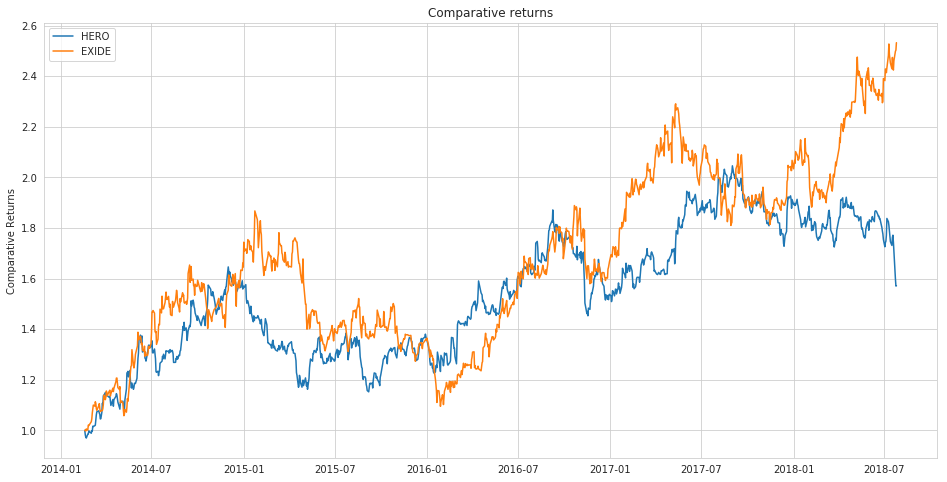

In [15]:
generate_returns_chart({"HERO":accumulator['HEROMOTOCO']['past_prices']['all_past_prices'],
                       "EXIDE":accumulator['EXIDEIND']['past_prices']['all_past_prices']})

#### Volatility analysis

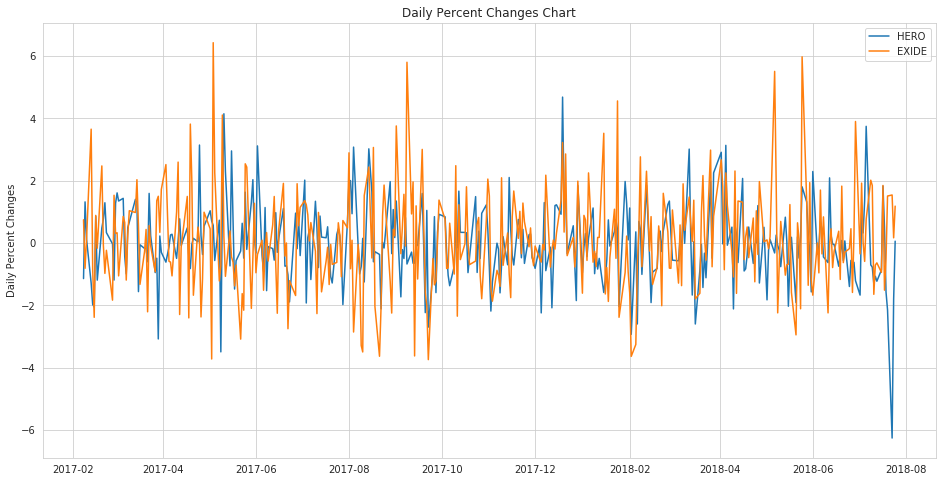

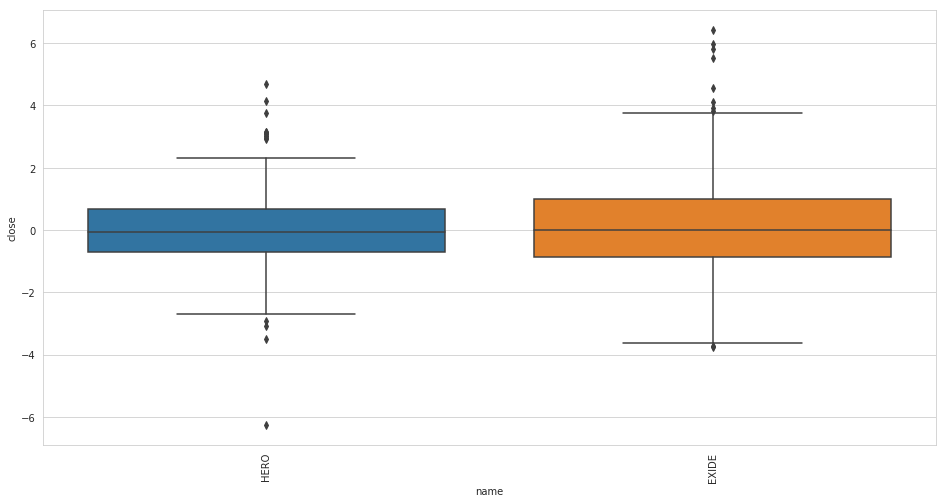

In [16]:

generate_percent_change_chart({"HERO":accumulator['HEROMOTOCO']['past_prices']['all_past_prices'],
                       "EXIDE":accumulator['EXIDEIND']['past_prices']['all_past_prices']},days=365)

#### Nifty 50, Nifty 100, Nifty midcap 50 Analysis

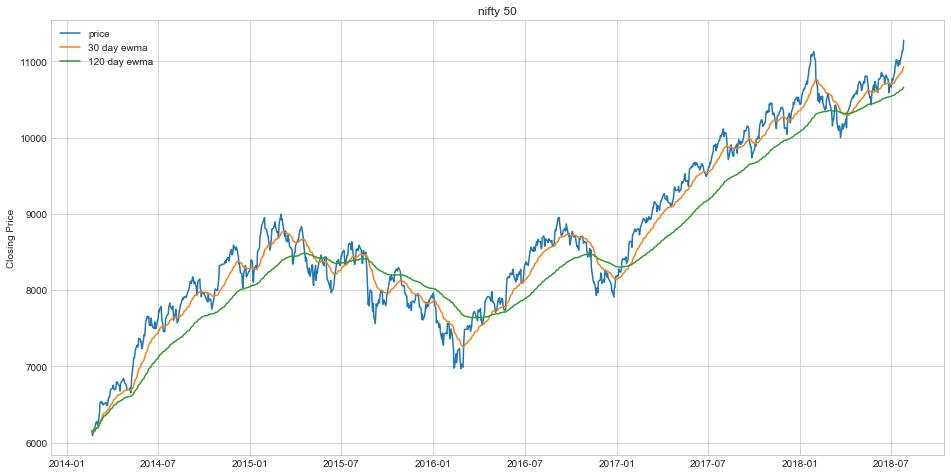

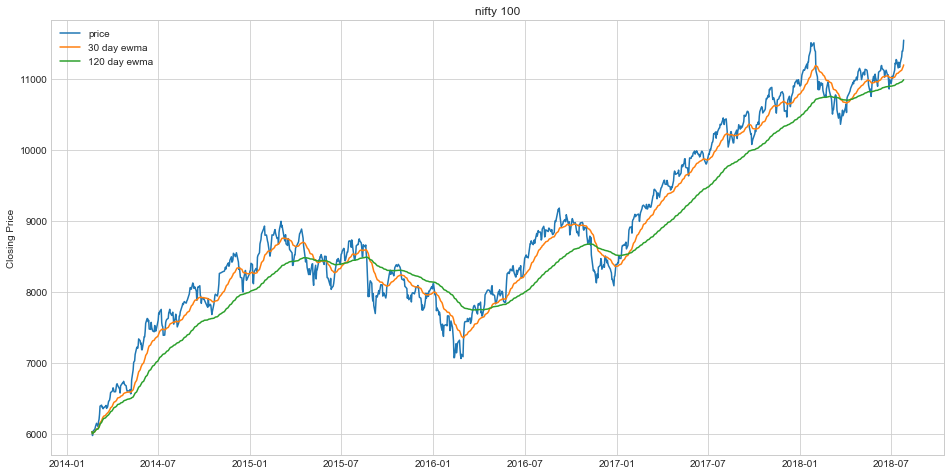

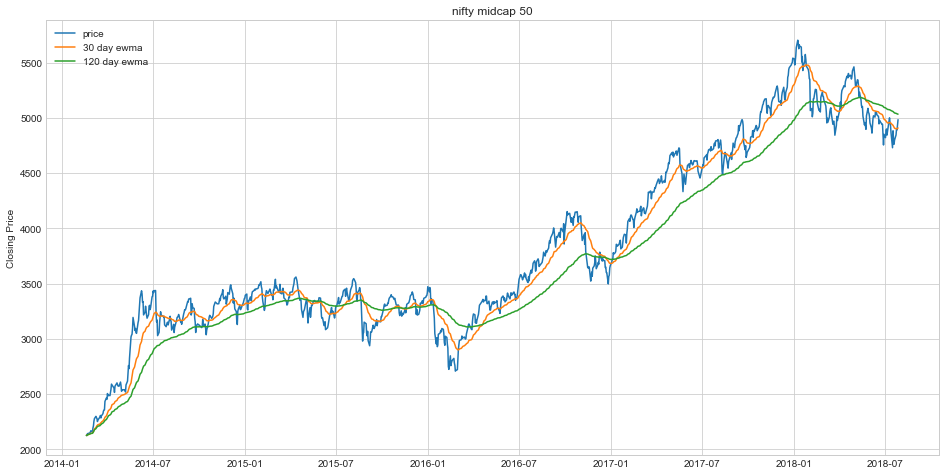

In [37]:
n50_url = "http://www.moneycontrol.com/tech_charts/nse/his/nifty.csv"
n50 = pd.read_csv(n50_url,header=None,names=['open','high','low','close','volume'])[['open','high','low','close','volume']]
n50.index = pd.to_datetime(n50.index)


n100_url = "http://www.moneycontrol.com/tech_charts/nse/his/cnx_100.csv"
n100 = pd.read_csv(n100_url,header=None,names=['open','high','low','close','volume'])[['open','high','low','close','volume']]
n100.index = pd.to_datetime(n100.index)

nmid_url = "http://www.moneycontrol.com/tech_charts/nse/his/nifty_midcap_50.csv"
nmid = pd.read_csv(nmid_url,header=None,names=['open','high','low','close','volume'])[['open','high','low','close','volume']]
nmid.index = pd.to_datetime(nmid.index)



generate_price_chart(n50,"nifty 50",days=1095,ewmas=[30,120])
generate_price_chart(n100,"nifty 100",days=1095,ewmas=[30,120])
generate_price_chart(nmid,"nifty midcap 50",days=1095,ewmas=[30,120])


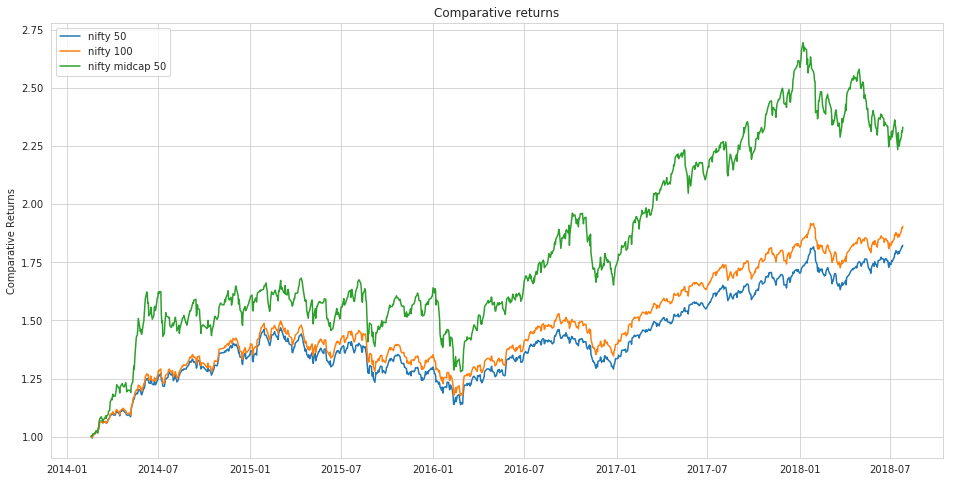

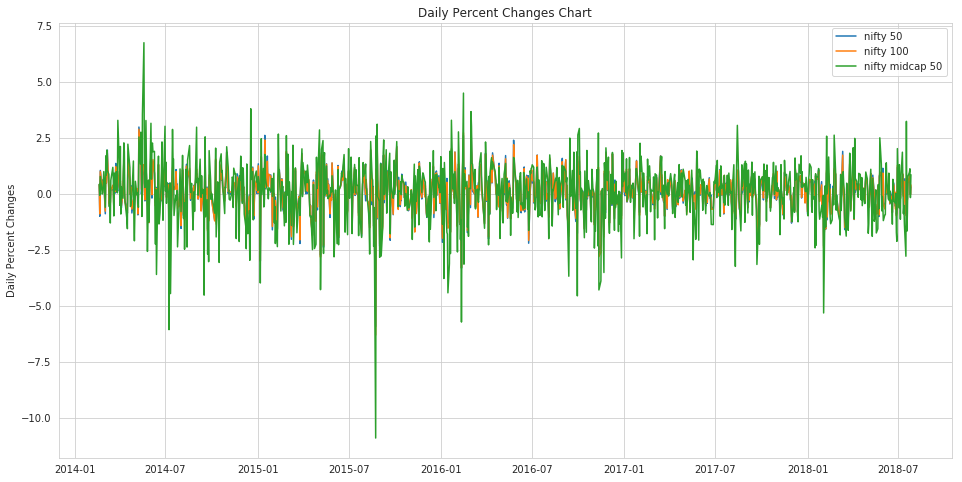

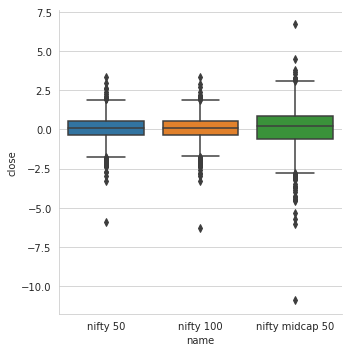

In [144]:


generate_returns_chart({"nifty 50":n50,"nifty 100":n100,"nifty midcap 50":nmid})
generate_percent_change_chart({"nifty 50":n50,"nifty 100":n100,"nifty midcap 50":nmid},days=1095)


#### Volatility vs Returns (Sharpe, alpha, beta)

### MF Analysis

In [13]:
# get avg pe and pb and deliverables
# get avg market cap
# current nav
# current aum
# last five year growth rate
# mfid = "MSB532"
# nifty MKM321 MSB1174
# Bluechip SBI MSB532

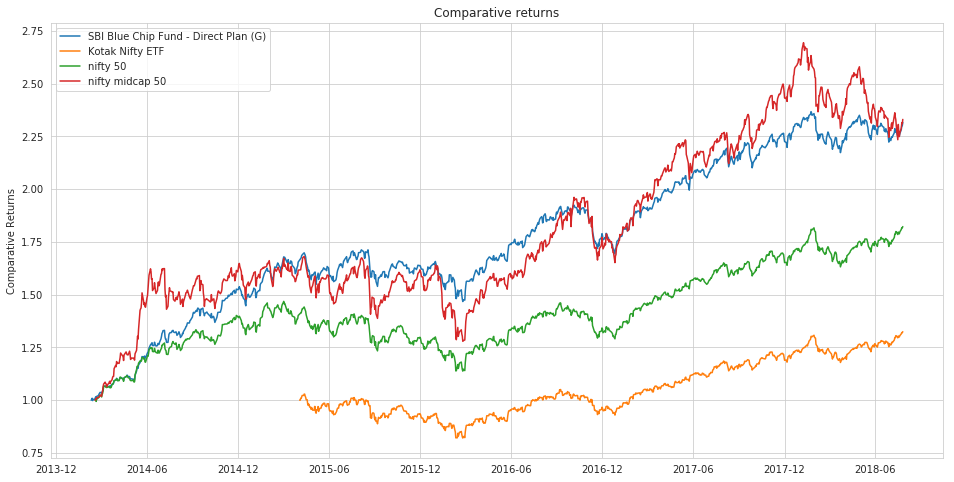

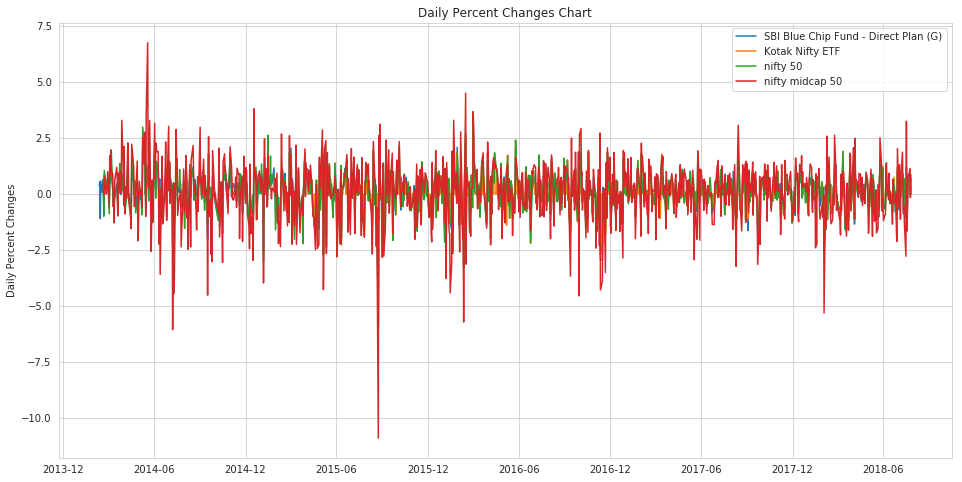

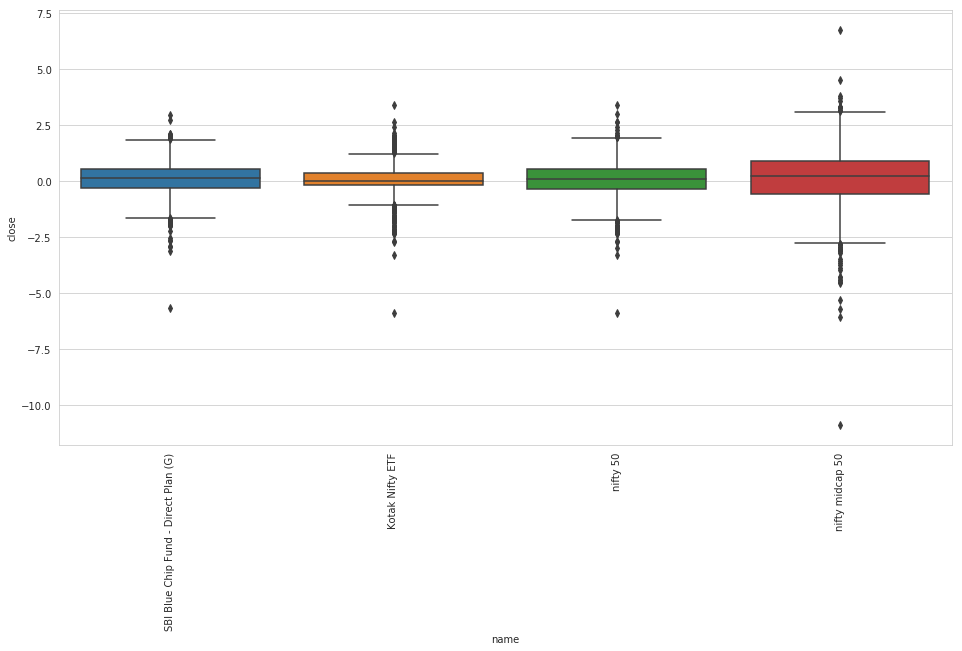

In [232]:
fund_price_analysis(['MSB532','MKM321'],{"nifty 50":n50,"nifty midcap 50":nmid})

In [17]:
comparative_analysis(['MSB532','MKM321'],threadpool_size=128)

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHA

Error for: /india/stockpricequote/cigarettes/itc/ITC


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Traceback (most recent call last):
  File "/home/ahemf/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 601, in urlopen
    chunked=chunked)
  File "/home/ahemf/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 387, in _make_request
    six.raise_from(e, None)
  File "<string>", line 2, in raise_from
  File "/home/ahemf/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 383, in _make_request
    httplib_response = conn.getresponse()
  File "/home/ahemf/anaconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/home/ahemf/anaconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/home/ahemf/anaconda3/lib/python3.6/http/client.py", line 266, in _read_status
    rai

Error for: /india/stockpricequote/infrastructure - general/sadbhav engg/SE19


  File "/home/ahemf/anaconda3/lib/python3.6/site-packages/requests/adapters.py", line 490, in send
    raise ConnectionError(err, request=request)
requests.exceptions.ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
  File "/home/ahemf/anaconda3/lib/python3.6/site-packages/requests/api.py", line 72, in get
    return request('get', url, params=params, **kwargs)
  File "/home/ahemf/anaconda3/lib/python3.6/site-packages/requests/api.py", line 58, in request
    return session.request(method=method, url=url, **kwargs)
  File "/home/ahemf/anaconda3/lib/python3.6/site-packages/requests/sessions.py", line 508, in request
    resp = self.send(prep, **send_kwargs)
  File "/home/ahemf/anaconda3/lib/python3.6/site-packages/requests/sessions.py", line 618, in send
    r = adapter.send(request, **kwargs)
  File "/home/ahemf/anaconda3/lib/python3.6/site-packages/requests/adapters.py", line 490, in send
    raise ConnectionError(err, requ

Error for: /india/stockpricequote/auto - cars  jeeps/maruti suzuki/MS24
Error for: /india/stockpricequote/banks - private sector/hdfc bank/HDF01


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHA

Scrips which failed to fetch = 4


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHA

Error for: /india/stockpricequote/auto - lcvs  hcvs/eicher motors/EM


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHA

Scrips which failed to fetch = 1


,aum,avg_market_cap,min_recovery_year,name,past_prices,pb,pe,peg,three_year_cpg
0,3734.91,95898.369517,17,SBI Blue Chip Fund - Direct Plan (G),open high low close...,5.818527,35.416192,4.048927,8.747056
1,502.84,304387.717181,15,Kotak Nifty ETF,open high low c...,4.267074,27.360261,2.901310,9.430314


### References

- https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/
- https://mapattack.wordpress.com/2017/02/14/python-for-stocks-2/

more involved articles:

 - https://ntguardian.wordpress.com/2018/07/17/stock-data-analysis-python-v2/
 - https://nextjournal.com/hisham/stock-market
 